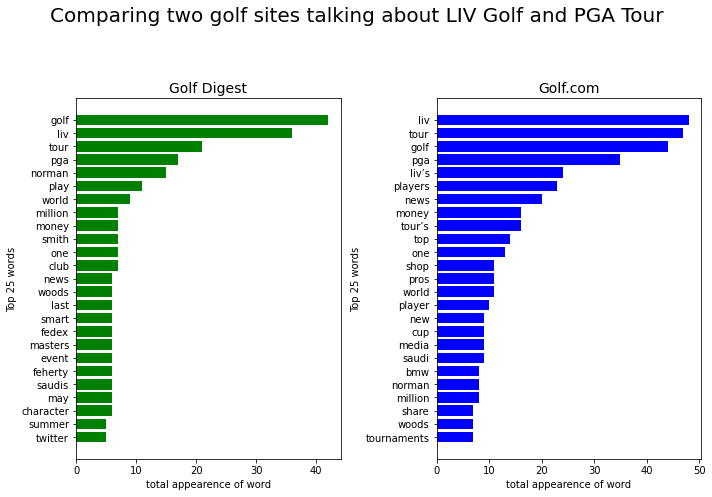

In [51]:
import requests, re, nltk
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter
import operator
import numpy as np
import pylab
import matplotlib.pyplot as plt

stop_words = nltk.corpus.stopwords.words('english') + [
 'ut', '\'re','.', ',', '--', '\'s', '?', ')', '(', ':', '\'',
 '\"', '-', '}', '{', '&', '|', u'\u2014', "it’s", 'really', 'said','','made','logo','like','would','digest','us']

def cleanWord (w):
    # r in r'[.,"\']' tells to treat \ as a regular character 
    # but we need to escape ' with \'
    # any character between the brackets [] is to be removed 
    wn = re.sub('[,"\.\'&\|:@>*;/=]', "", w)
    # get rid of numbers
    return re.sub('^[0-9\.]*$', "", wn)

def words(web):
    r = requests.get(web)
    bowl = BeautifulSoup(r.text, 'html.parser')
    condensed = bowl.get_text()
    condensed = condensed.lower()
    condensed = re.split('\s+',condensed)
    
    
    for i in range(len(condensed)):
        condensed[i] = cleanWord(condensed[i])
    
    wf = Counter (condensed)
    for k in stop_words:
        wf. pop(k, None)
    
    tw = 0
    for w in wf:
       tw += wf[w]
    
    wfs = sorted (wf .items(), key = operator.itemgetter(1), reverse=True)
    ml = min(len(wfs),25)
    return (wfs [ 0:ml ] [::-1], tw)


(wf_ee, tw_ee) = words('https://www.golfdigest.com/story/liv-golf-vs-pga-tour-summer-of-golfs-discontent/')
(wf_bu, tw_bu) = words('https://golf.com/news/liv-pga-tour-inside-story/')


%matplotlib inline
plotting, (a,b) = plt.subplots(1,2,figsize= (10,7))
plotting.suptitle("Comparing two golf sites talking about LIV Golf and PGA Tour\n\n",fontsize=20)
a.barh([ x [0] for x in wf_ee],[x [1] for x in wf_ee],color ='g')
b.barh([x [0] for x in wf_bu],[x [1] for x in wf_bu],color = 'b')
a.set_title("Golf Digest",fontsize=14)
b.set_title("Golf.com",fontsize=14)
a.set_xlabel('total appearence of word')
b.set_xlabel('total appearence of word')
a.set_ylabel('Top 25 words')
b.set_ylabel('Top 25 words')
plt.tight_layout()
plt.show()






#end of code

In [ ]:
I wanted to see if there was a difference in writing between sites that shows their feelings towards the upcoming of the LIV golf tour.